<a href="https://colab.research.google.com/github/erlanig/machine-learning/blob/main/PCA_Mammographic%20Mass%20Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
url = "Mammographic_Mass.csv"
df = pd.read_csv(url, names = ['BI-RADS','Age','Shape','Margin','Density','Severity'])

In [ ]:
df.isnull().sum()

BI-RADS     0
Age         0
Shape       0
Margin      0
Density     0
Severity    0
dtype: int64

In [ ]:
df.dropna()

,BI-RADS,Age,Shape,Margin,Density,Severity
0,5,67,3,5,3,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,57,1,5,3,1
4,5,76,1,4,3,1
...,...,...,...,...,...,...
825,4,47,2,1,3,0
826,4,56,4,5,3,1
827,4,64,4,5,3,0
828,5,66,4,5,3,1


In [ ]:
features = ['BI-RADS','Age','Shape','Margin','Density']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['Severity']].values

In [ ]:
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [ ]:
#Menampilkan x setelah diskalakan
print('Data fitur setelah diskalakan (x) : \n', x)

Data fitur setelah diskalakan (x) : 
 [[ 0.3211177   0.7650629   0.17563638  1.39618483  0.24046607]
 [ 0.3211177   0.15127063  0.98104077  1.39618483  0.24046607]
 [-0.20875843 -1.89470363 -1.43517241 -1.157718    0.24046607]
 ...
 [-0.20875843  0.56046548  0.98104077  1.39618483  0.24046607]
 [ 0.3211177   0.69686376  0.98104077  1.39618483  0.24046607]
 [-0.20875843  0.42406719  0.17563638  0.11923341  0.24046607]]


In [ ]:
#Menampilkan dataframe data
df.head()

,BI-RADS,Age,Shape,Margin,Density,Severity
0,5,67,3,5,3,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,57,1,5,3,1
4,5,76,1,4,3,1


In [ ]:
pca = PCA(n_components = 2)
principalComponents=pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
                         , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['Severity']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,Severity
0,1.404972,-0.085645,1
1,1.606969,-0.077969,1
2,-2.436044,-0.573978,0
3,0.133324,-0.279476,1
4,0.333889,-0.166166,1


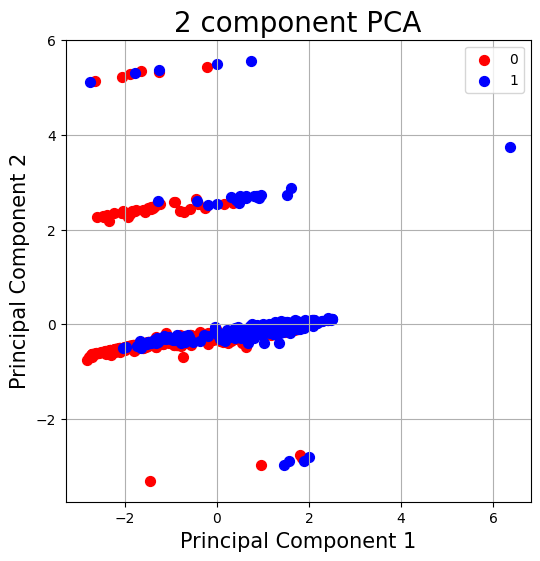

In [ ]:
#Visualisasi proyeksi 2D
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1)

#Memberi label untuk sumbu x sebagai Principal Component 1
ax.set_xlabel('Principal Component 1', fontsize = 15)

#Memberi label untuk sumbu x sebagai Principal Component 2
ax.set_ylabel('Principal Component 2', fontsize = 15)

ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Severity'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)

ax.legend(targets)
ax.grid()

In [ ]:
pca.explained_variance_ratio_

array([0.42489411, 0.19661697])